# Plotting nicer graphs
* For plotting nicer plot we use plt.imshow().
* First we convert the unstructured data to mesh grid then use plt.imshow()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata # interpolation
from mpl_toolkits.mplot3d import Axes3D # for 3D if needed
from matplotlib import cm # colormap
from matplotlib import ticker # controls number of ticks in colorbar, helpful for very ugly unsymmetric colorbar

In [3]:
data = np.load('Data_30000_iteration.npz') # Load data from file
keys = list(data.keys()) # all keys in the dictionary
print(keys)

['nodes', 'temperature', 'max_iter', 'best_error_vec', 'best_u_pred', 'final_error_vec', 'final_u_pred', 'best_iter', 'PDE_loss_array', 'BC_loss_array', 'total_loss_array', 'test_error_array']


In [4]:
nodes = data[keys[0]]
temperature = data[keys[1]]
max_iter = data[keys[2]]
best_error_vec = data[keys[3]]
best_u_pred = data[keys[4]]
final_error_vec = data[keys[5]]
final_u_pred = data[keys[6]]
best_iter = data[keys[7]]
PDE_loss_array = data[keys[8]]
BC_loss_array = data[keys[9]]
total_loss_array = data[keys[10]]
test_error_array = data[keys[11]]
data.close()

In [5]:
total_loss_array[-1]

0.026954645290970802

In [5]:
# plt.scatter(nodes[:,0],nodes[:,1],c=best_u_pred)

## Training and Validation loss subplot

/tmp/ipykernel_17671/4019325733.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(bottom=0)  # https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.ylim.html


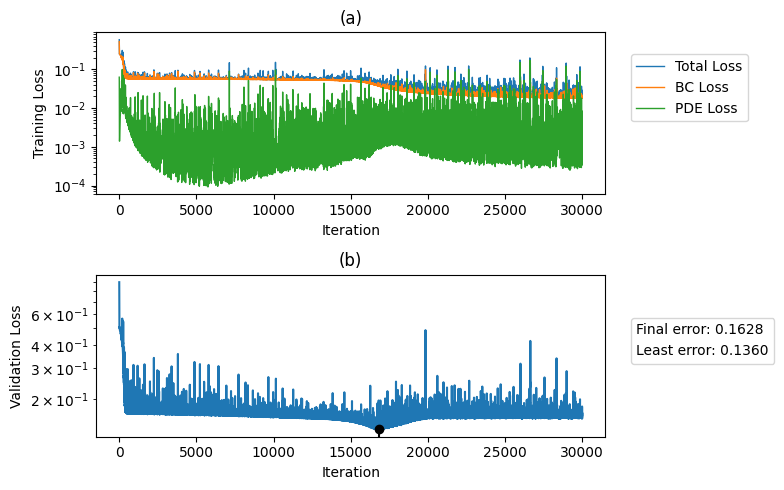

In [16]:
fig, ax = plt.subplots(2, 1,dpi=100,figsize=(8, 5))
iter_array = np.arange(0,max_iter)
ax[1].plot(iter_array,test_error_array)
ax[1].plot([best_iter,best_iter],[0,best_error_vec],'o-k')
ax[1].set_yscale('log')
ax[1].set(xlabel='Iteration', ylabel='Validation Loss')
# See this post how to remove the legend lines: https://stackoverflow.com/questions/25123127/how-do-you-just-show-the-text-label-in-plot-legend-e-g-remove-a-labels-line
ax[1].legend([f'Final error: {test_error_array[-1]:.4f}',f'Least error: {best_error_vec:.4f}'],handlelength=0, handletextpad=0, fancybox=True,markerscale=0, loc=(1.05, 0.45))
ax[1].set_ylim(bottom=0)  # https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.ylim.html
ax[0].plot(iter_array,total_loss_array, linewidth=1)
ax[0].plot(iter_array,BC_loss_array, linewidth=1)
ax[0].plot(iter_array, PDE_loss_array, linewidth=1)
ax[0].legend(['Total Loss','BC Loss','PDE Loss'],loc=(1.05, 0.45))
ax[0].set(xlabel='Iteration', ylabel='Training Loss')
ax[0].set_yscale('log')


ax[0].set_title('(a)')#, fontdict={'fontsize': size, 'fontweight': 'medium'})
ax[1].set_title('(b)')#, fontdict={'fontsize': size, 'fontweight': 'medium'})
#ax[2].set_title('(c)', fontdict={'fontsize': size, 'fontweight': 'medium'})

#fig.supxlabel('common_x')
fig.tight_layout()
plt.savefig('plots/errors_subplot_'+str(max_iter)+'_iteration.jpg',dpi=500)

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image


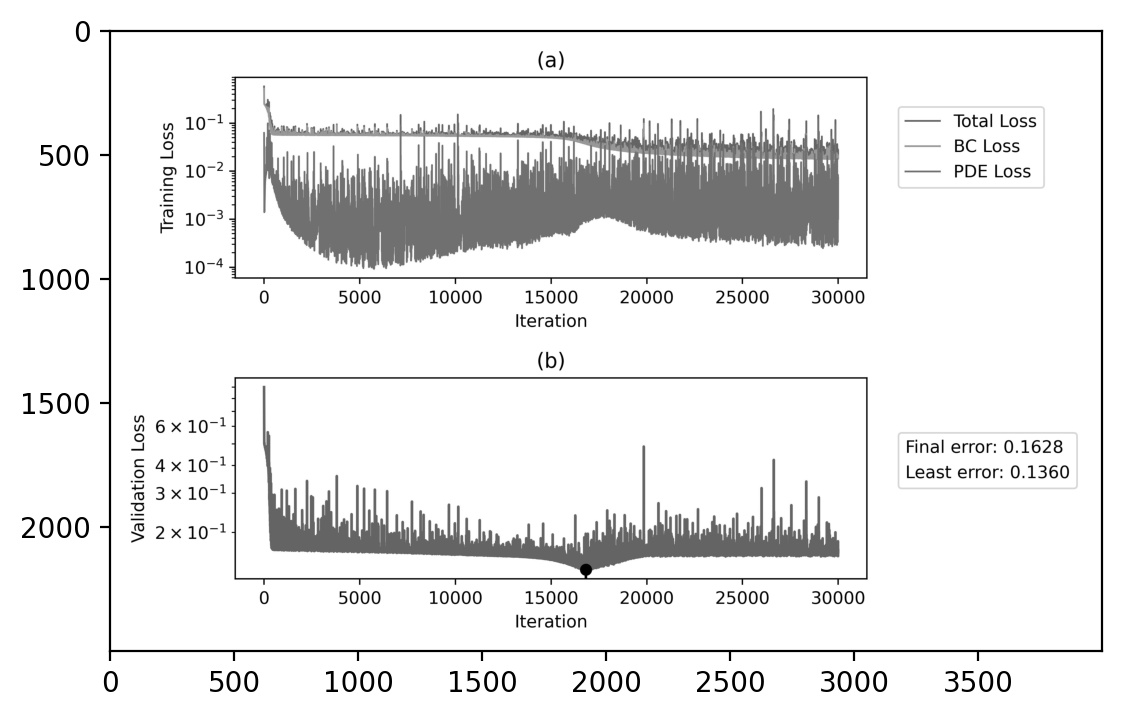

In [19]:
# fname = 'plots/errors_subplot_30000_iteration.jpg'
# image = Image.open(fname).convert("L")
# arr = np.asarray(image)
# plt.figure(dpi=200)
# plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

## Some values

In [7]:
ub = nodes.max(axis=0)
lb = nodes.min(axis=0)
print(ub)
print(lb)
n_points = 300
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
X, Y = np.meshgrid(x,y)

[0.5 1. ]
[-0.5  0. ]


## Ground truth

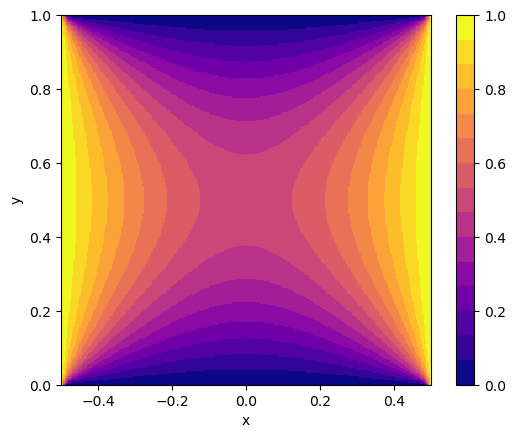

In [8]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)#, projection='3d')

new_data = griddata(nodes, temperature.flatten(), (X, Y), method='linear')
sc = ax.imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal')

#sc = ax.scatter(nodes[:,0], nodes[:,1], c = temperature,s=3, cmap=cm.jet)


#sc1.cmap.set_under('white')
#sc1.cmap.set_over('gray')

plt.colorbar(sc)
plt.xlabel('x')
plt.ylabel('y')
#ax.set_zlabel('z')
#plt.title('Temperature distribution')
plt.savefig('plots/Exact.jpg', dpi = 500)

## PINN prediction and absolute error subplot

In [9]:
# Loading data
# best model for 5k
# final model for 10K
# final model for 30k
data30k = np.load('Data_30000_iteration.npz')
data10k = np.load('Data_10000_iteration.npz')
data5k = np.load('Data_5000_iteration.npz')
# nodes and temperature i.e the true result is going to be the same. we won't load it as it is already loaded in cell [2]
u_pred_5k = data5k[keys[4]] # the best model
u_pred_10k = data30k[keys[4]] # the final model
u_pred_30k = data30k[keys[6]] # the final model
data30k.close()
data10k.close()
data5k.close()

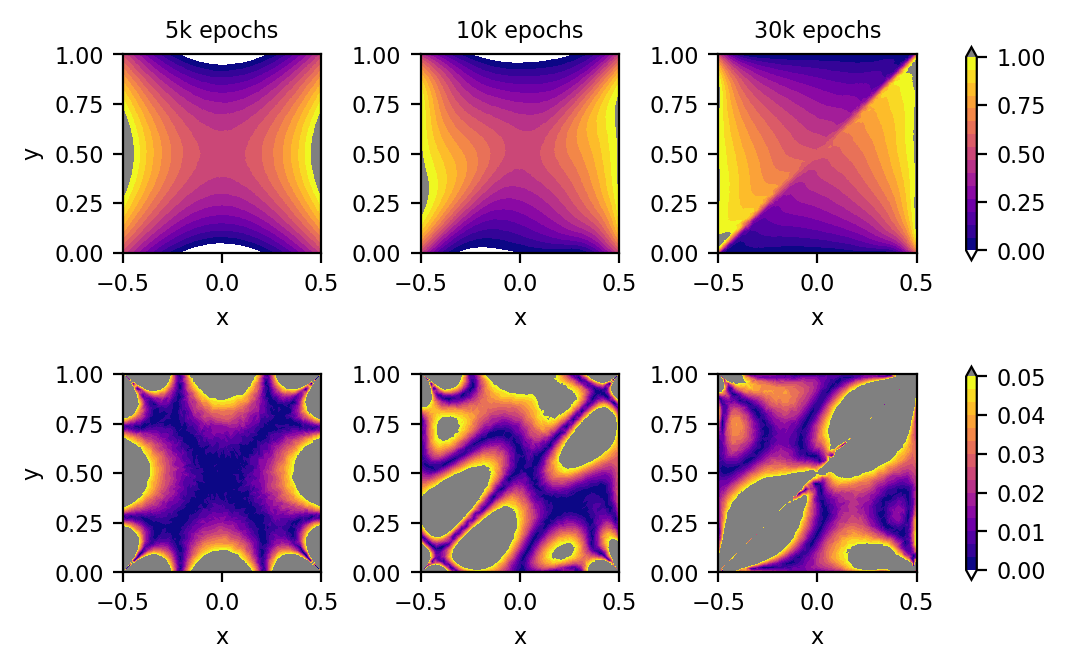

In [16]:
fig, ax = plt.subplots(2, 3,dpi=200)
#ax = fig.add_subplot(111)#, projection='3d')
n_points = 1000
# Intepolation points
x = np.linspace(lb[0], ub[0], n_points)
y = np.linspace(lb[1], ub[1], n_points)
# Create meshgrid
X, Y = np.meshgrid(x,y)
# PINN predictions
new_data = griddata(nodes, u_pred_5k.flatten(), (X, Y), method='linear')
sc1 =  ax[0,0].imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)

sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')

new_data = griddata(nodes, u_pred_10k.flatten(), (X, Y), method='linear')
sc1 =  ax[0,1].imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)

sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')

new_data = griddata(nodes, u_pred_30k.flatten(), (X, Y), method='linear')
sc1 =  ax[0,2].imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1)

sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')

# Absolute error
new_data = griddata(nodes, abs(u_pred_5k-temperature).flatten(), (X, Y), method='linear')
sc2 =  ax[1,0].imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')
new_data = griddata(nodes, abs(u_pred_10k-temperature).flatten(), (X, Y), method='linear')
sc2 =  ax[1,1].imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)

sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')

new_data = griddata(nodes, abs(u_pred_30k-temperature).flatten(), (X, Y), method='linear')
sc2 =  ax[1,2].imshow(new_data, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)
#sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
#plt.colorbar(sc)
# setting color bounds on PINN predictions only
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')

#  setting axis labels and size
ax[0,0].set(xlabel='x', ylabel='y')
# big axis lebel looks ugly, defauly is 10, I set it to 8. see this: https://stackoverflow.com/a/46651121/14598633
ax[0,0].xaxis.label.set_size(8)
ax[0,0].yaxis.label.set_size(8)
#ax[0,0].set_xticks([])
ax[0,1].set(xlabel='x', ylabel='')
ax[0,1].xaxis.label.set_size(8)
ax[0,1].yaxis.label.set_size(8)
#ax[0,1].set_xticks([])
#ax[0,1].set_yticks([])
ax[0,2].set(xlabel='x', ylabel='')
ax[0,2].xaxis.label.set_size(8)
ax[0,2].yaxis.label.set_size(8)
#ax[0,2].set_xticks([])
#ax[0,2].set_yticks([])
ax[1,0].set(xlabel='x', ylabel='y')
ax[1,0].xaxis.label.set_size(8)
ax[1,0].yaxis.label.set_size(8)
ax[1,1].set(xlabel='x', ylabel='')
ax[1,1].xaxis.label.set_size(8)
ax[1,1].yaxis.label.set_size(8)
#ax[1,1].set_yticks([])
ax[1,2].set(xlabel='x', ylabel='')
ax[1,2].xaxis.label.set_size(8)
ax[1,2].yaxis.label.set_size(8)
#ax[1,2].set_yticks([])
#ax[1,2].tick_params(axis='x', labelsize= 5)

# Setting title
ax[0,0].set_title('5k epochs',fontsize=8)
ax[0,1].set_title('10k epochs',fontsize=8)
ax[0,2].set_title('30k epochs',fontsize=8)
# ax[1,0].set_title('(d)',fontsize=8)
# ax[1,1].set_title('(e)',fontsize=8)
# ax[1,2].set_title('(f)',fontsize=8)

# tight layout is mostly good but not here. Plots becomes too small to see anything.
#fig.tight_layout()

# see this for tick label [numbers on axis] adjustment: https://stackoverflow.com/a/11386056/14598633
# default is 10
for col in range(3):
    for row in range(2):
        ax[row, col].tick_params(axis='both', which='major', labelsize=8)


# This one is better than tight_layout
# adjust width and height:https://stackoverflow.com/a/6541454/14598633
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.23   # the bottom of the subplots of the figure
top = 0.2      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.05   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=left, bottom=bottom, right=right, top=None, wspace=wspace, hspace=hspace)

# for customised colormaps, see: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html
cbar1 = fig.colorbar(sc1, ax=[ax[0,0],ax[0,1],ax[0,2]], shrink=0.7,extend='both')
cbar1.ax.tick_params(labelsize=8) # colorbar label size
cbar2 = fig.colorbar(sc2, ax=[ax[1,0],ax[1,1],ax[1,2]], shrink=0.7,extend='both')
cbar2.ax.tick_params(labelsize=8) # colorbar label size
# It turns out cbar2 looks very ugly with only 2 ticks, so to add more tick/bins, do the following.
tick_locator = ticker.MaxNLocator(nbins=6) # 6 bins comes from hit and trial. No rules
cbar2.locator = tick_locator
cbar2.update_ticks()

plt.savefig('plots/Iteration_'+str(max_iter)+'_PINN_predicted-subplot.jpg', dpi = 500,bbox_inches='tight',transparent=True)

## Final PINN prediction

In [11]:
# fig = plt.figure(dpi=300)
# ax = fig.add_subplot(111)#, projection='3d')
# new_data = griddata(nodes, final_u_pred.flatten(), (X, Y), method='linear')
# sc = ax.imshow(new_data, interpolation='nearest', cmap='jet', 
#                   extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
#                   origin='lower', aspect='equal',vmin=0, vmax=1)

# #sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
# plt.colorbar(sc)
# sc.cmap.set_under('k')
# sc.cmap.set_over('k')
# plt.xlabel('x')
# plt.ylabel('y')
# #ax.set_zlabel('z')
# #plt.title('Temperature distribution')
# #plt.savefig('Iteration_'+str(max_iter)+'Final_PINN_predicted.jpg', dpi = 200)

## Absolute best model error

In [12]:
# ub = nodes.max(axis=0)
# lb = nodes.min(axis=0)
# print(ub)
# print(lb)
# n_points = 300
# # Intepolation points
# x = np.linspace(lb[0], ub[0], n_points)
# y = np.linspace(lb[1], ub[1], n_points)
# # Create meshgrid
# X, Y = np.meshgrid(x,y)

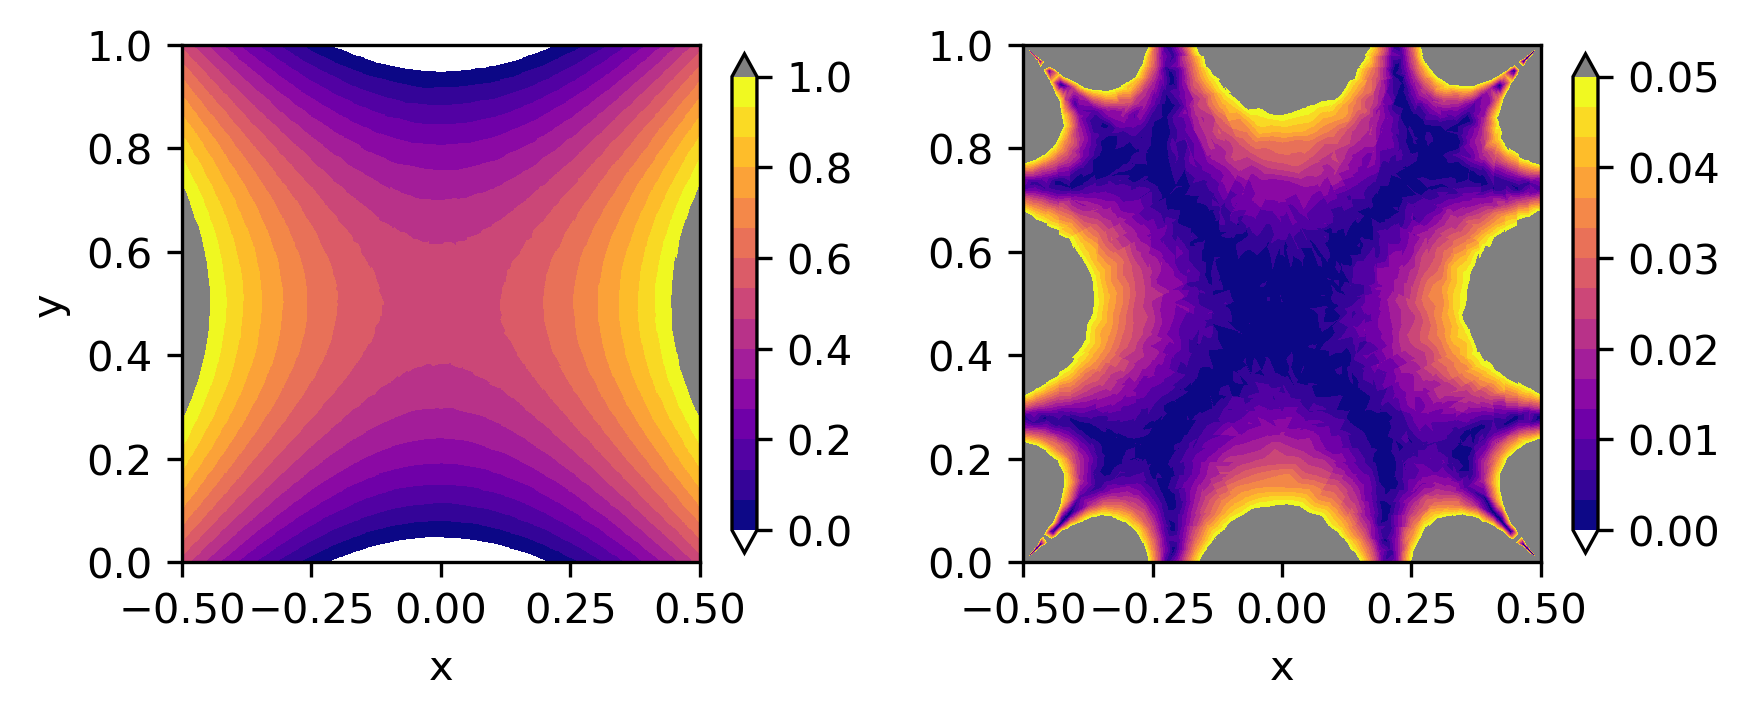

In [13]:
fig, ax = plt.subplots(1, 2,dpi=300)
#ax = fig.add_subplot(111)#, projection='3d')
# deepxde result
data_deepxde = griddata(nodes, u_pred_5k.flatten(), (X, Y), method='linear')
sc1 = ax[0].imshow(data_deepxde, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=1.0)

# n_points = 300
# # Intepolation points
# x = np.linspace(lb[0], ub[0], n_points)
# y = np.linspace(lb[1], ub[1], n_points)
# # Create meshgrid
# X, Y = np.meshgrid(x,y)

# absolute pointwise difference
data_difference = griddata(nodes, abs(u_pred_5k-temperature).flatten(), (X, Y), method='linear')
sc2 = ax[1].imshow(data_difference, interpolation='nearest', cmap=plt.get_cmap('plasma', 15), 
                  extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
                  origin='lower', aspect='equal',vmin=0, vmax=0.05)

sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')
sc2.cmap.set_under('white')
sc2.cmap.set_over('gray')

#sc = ax.scatter(nodes[:,0], nodes[:,1], c = temperature,s=3, cmap=cm.jet)
#plt.colorbar(sc)
ax[0].set(xlabel='x', ylabel='y')
ax[1].set(xlabel='x', ylabel='')
#fig.tight_layout()
# This one is better than tight_layout
# adjust width and height:https://stackoverflow.com/a/6541454/14598633
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.1   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)


#fig.colorbar(sc1, ax=ax.ravel().tolist(),shrink=0.5)
fig.colorbar(sc1, ax=ax[0],shrink=0.45, extend="both")
fig.colorbar(sc2, ax=ax[1],shrink=0.45, extend="both")
#fig.supxlabel('(b) Model 2',y=0.15)#, fontsize=5)


#fig.tight_layout()
#ax.set_zlabel('z')
#plt.title('Temperature distribution')
plt.savefig('plots/solutions.jpg', dpi = 500,bbox_inches='tight',transparent=True)
# https://stackoverflow.com/a/63076575/14598633

## Absolute final model error

In [14]:
# fig = plt.figure(dpi=300)
# ax = fig.add_subplot(111)#, projection='3d')

# new_data = griddata(nodes, abs(final_u_pred.flatten()-temperature.flatten()), (X, Y), method='linear')
# sc = ax.imshow(new_data, interpolation='nearest', cmap='jet', 
#                   extent=[nodes[:,0].min(), nodes[:,0].max(), nodes[:,1].min(), nodes[:,1].max()], 
#                   origin='lower', aspect='equal')

# #sc = ax.scatter(nodes[:,0], nodes[:,1], c = abs(best_u_pred-temperature), cmap=cm.jet)
# plt.colorbar(sc)
# #sc.cmap.set_under('k')
# #sc.cmap.set_over('k')
# plt.xlabel('x')
# plt.ylabel('y')
# #ax.set_zlabel('z')
# #plt.title('Temperature distribution')
# #plt.savefig('iteration_'+str(max_iter)+'_final_absolute-error.jpg', dpi = 200)